<a href="https://colab.research.google.com/github/ngoan22mse23088/ImageVideoProcessing/blob/master/IVP501_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

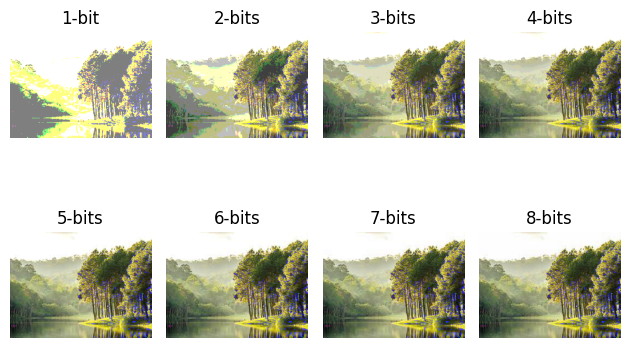

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/blob/master/Image/nature.jpg?raw=true'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image)

# Repeat with different number of bits
for no_of_bit in range(1, 9):
    # Quantize to a given number of bits
    no_of_level = 2 ** no_of_bit
    level_gap = 256 / no_of_level

    # Quantization
    quantized_img = np.uint8(np.ceil(img / level_gap) * level_gap - 1)

    # Plot image
    plt.subplot(2, 4, no_of_bit)
    plt.imshow(quantized_img)
    plt.axis('off')

    # Image caption and saving
    if no_of_bit == 1:
        name = str(no_of_bit) + '-bit'
    else:
        name = str(no_of_bit) + '-bits'

    plt.title(name)

plt.tight_layout()
plt.show()


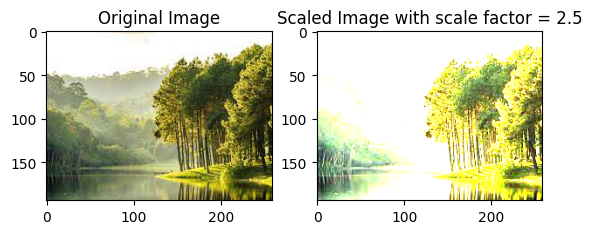

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/nature.jpg'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image).astype(float) / 255.0

# Brightness adjustment by intensity scaling
scale = 2.5  # Lighter
scaled_img = scale * img

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(img, vmin=0, vmax=1)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(scaled_img, vmin=0, vmax=1)
plt.title('Scaled Image with scale factor = 2.5')

# Save the scaled image
plt.savefig('Brightness_Lighter.jpg')
plt.show()

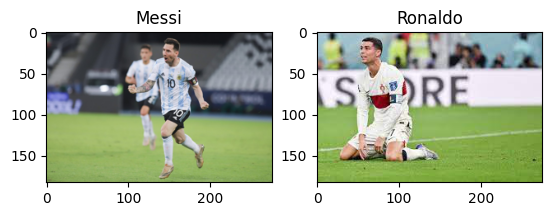

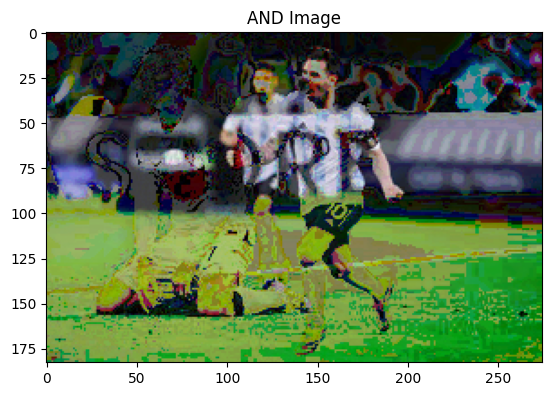

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# URLs of the images on GitHub
image1_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/messi.jpg'
image2_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/ronaldo.jpg'

# Download the images
image1_data = urlopen(image1_url)
image2_data = urlopen(image2_url)

# Convert the downloaded data to PIL Image objects
image1 = Image.open(image1_data)
image2 = Image.open(image2_data)

# Resize image1 to match the desired size
desired_size = (275, 183)
image1 = image1.resize(desired_size)

# Convert PIL Images to NumPy arrays
I1 = np.array(image1)
I2 = np.array(image2)

# Perform bitwise AND operation
I_and = np.bitwise_and(I1, I2)

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.title('Messi')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.title('Ronaldo')

plt.figure()
plt.imshow(I_and, cmap='gray', vmin=0, vmax=255)
plt.title('AND Image')

# Save the AND image
plt.savefig('AND_image.jpg')
plt.show()

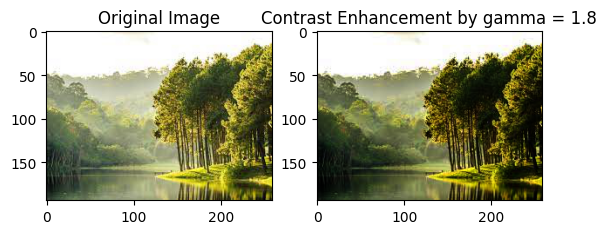

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/nature.jpg'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image).astype(float) / 255.0

# Contrast enhancement by changing 'gamma' characteristics
# gamma = 1.0  # Unchanged
# gamma = 0.3  # Decrease contrast
gamma = 1.8  # Increase contrast
gamma_img = img ** gamma

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gamma_img)
plt.title('Contrast Enhancement by gamma = 1.8')

# Save the contrast-enhanced image
plt.savefig('Contrast_Increase.png')
plt.show()

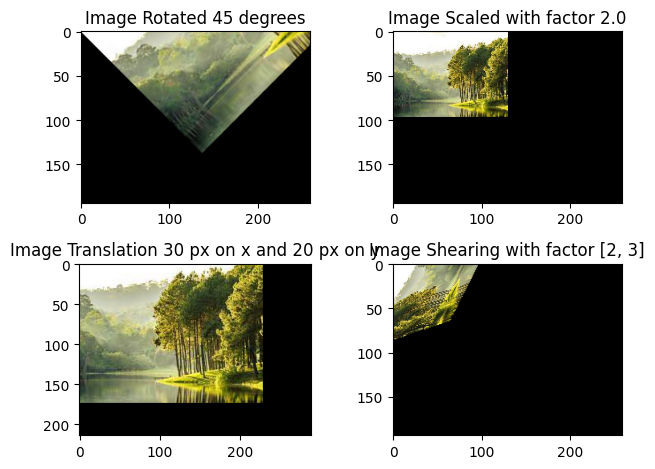

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import warp, AffineTransform

# Load image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/nature.jpg')

# Rotation an angle = 45 degrees
rotation_matrix = np.array([[np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45)), 0],
                            [np.sin(np.deg2rad(45)), np.cos(np.deg2rad(45)), 0],
                            [0, 0, 1]])
Imga = warp(Img, AffineTransform(matrix=rotation_matrix))
plt.subplot(2, 2, 1)
plt.imshow(Imga)
plt.title('Image Rotated 45 degrees')

# Scaling with a factor = 2.0
scaling_matrix = np.array([[2.0, 0, 0],
                           [0, 2.0, 0],
                           [0, 0, 1]])
Imgb = warp(Img, AffineTransform(matrix=scaling_matrix))
plt.subplot(2, 2, 2)
plt.imshow(Imgb)
plt.title('Image Scaled with factor 2.0')

# Translation 30 pixels on x and 20 pixels on y
translation_matrix = np.array([[1, 0, 30],
                               [0, 1, 20],
                               [0, 0, 1]])
Imgc = warp(Img, AffineTransform(matrix=translation_matrix),
            output_shape=(Img.shape[0]+20, Img.shape[1]+30))
plt.subplot(2, 2, 3)
plt.imshow(Imgc)
plt.title('Image Translation 30 px on x and 20 px on y')

# Shearing
shearing_matrix = np.array([[1, 3, 0],
                            [2, 1, 0],
                            [0, 0, 1]])
Imgd = warp(Img, AffineTransform(matrix=shearing_matrix))
plt.subplot(2, 2, 4)
plt.imshow(Imgd)
plt.title('Image Shearing with factor [2, 3]')

plt.tight_layout()
plt.show()

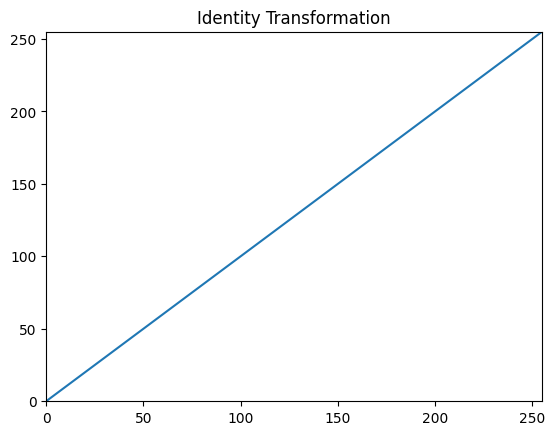

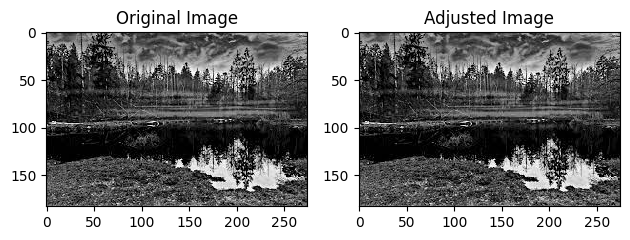

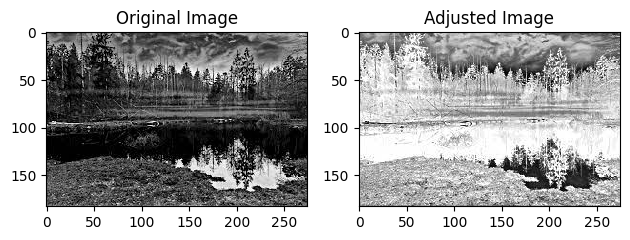

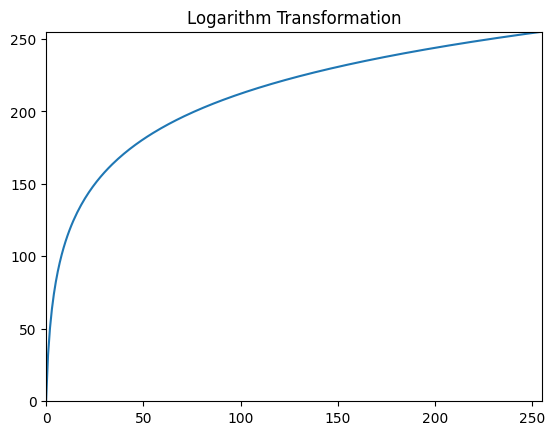

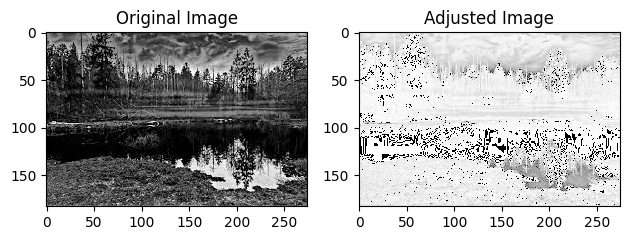

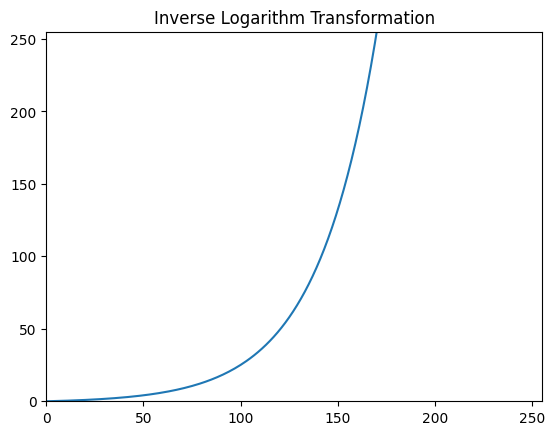

ValueError: ignored

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte

# Load image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/swamp.jpg')

# Normalize image to range [0, 1]
Img = img_as_ubyte(Img)
#a. Contrast with identity transformation
x = np.arange(256, dtype=np.uint8)
plt.plot(x)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Identity Transformation')
plt.show()
Img_idt = x[Img]
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_idt)
plt.title('Adjusted Image')
plt.show()

#b. Contrast with negative transformation
Img_cpm = 255 - Img
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_cpm)
plt.title('Adjusted Image')
plt.show()

#c. Contrast with logarithm transformation
x = np.arange(256)
c = 255 / np.log(256)
y = c * np.log(x + 1)

plt.plot(y)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Logarithm Transformation')
plt.show()

# Apply logarithm transformation to the image
Img_log = y[img_as_ubyte(Img * 255 / np.max(Img))] / 255
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_log)
plt.title('Adjusted Image')
plt.show()

#d. Contrast with inverse logarithm transformation
x = np.arange(256)
c = 255 / np.log(4096)
y = np.exp(x / c) - 1

plt.plot(y)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Inverse Logarithm Transformation')
plt.show()

# Apply inverse logarithm transformation to the image
Img_invlog = y[img_as_ubyte(Img * 255 / np.max(Img))] / 255
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_invlog)
plt.title('Adjusted Image')
plt.show()

#e. Contrast with piecewise linear transformation
y = np.zeros(256)
y[:175] = np.arange(175)
y[175:201] = 255
y[201:] = np.arange(200, 256)
Img_pcslin = img_as_ubyte(y[Img])
plt.figure()
plt.subplot(1, 3, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.plot(y)
plt.axis('tight')
plt.axis('square')
plt.title('Piecewise Linear Transformation')
plt.subplot(1, 3, 3)
imshow(Img_pcslin)
plt.title('Adjusted Image')
plt.show()